In [67]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from src.path_loss import PathLossInHIndoorOffice, PathLossInHShoppingMalls

from src.network_sim import NetworkSimulator


%reload_ext autoreload
%autoreload 2
%aimport src

In [68]:
frequency_Hz= 50 * 1e9 # Hz
distance_m = 50
sample_size = 10

In [69]:
pd.DataFrame({
    'PathLossInHIndoorOffice':[PathLossInHIndoorOffice().in_dBm(frequency_Hz=frequency_Hz, distance_m=distance_m) for i in range(sample_size)],
    'PathLossInHShoppingMalls': [PathLossInHShoppingMalls().in_dBm(frequency_Hz=frequency_Hz, distance_m=distance_m) for i in range(sample_size)],
})

,PathLossInHIndoorOffice,PathLossInHShoppingMalls
0,-133.897807,-103.739513
1,-131.871112,-107.080335
2,-144.595920,-113.625351
3,-128.402439,-100.170267
4,-137.993922,-94.908223
5,-119.372512,-97.146992
6,-123.062663,-111.377403
7,-132.201249,-98.279399
8,-134.445890,-105.931246
9,-130.975092,-102.910524


In [80]:
simulator = NetworkSimulator(Tx_radius=100, Rx_radius=25, num_Tx_known=3, num_Rx_per_Tx_known=5, num_Tx_unknown=2, num_Rx_per_Tx_unknown=3)

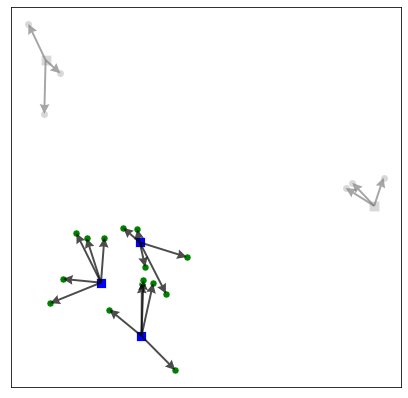

In [81]:
simulator.plot_network()

In [82]:
pd.DataFrame(simulator.gain_mat_dBm)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-96.741560,-106.295654,-110.716042,-87.149514,-107.100478,-88.813074,-92.215206,-88.101184,-106.754880,-105.423921,...,-95.074260,-89.477883,-97.552084,-101.535362,-122.775197,-111.164740,-125.030542,-114.875441,-123.876278,-110.752568
1,-104.816259,-110.456938,-91.575549,-104.609687,-86.663320,-87.412025,-108.583920,-82.541045,-113.746372,-100.237289,...,-89.209957,-100.709807,-101.792627,-99.046567,-115.270342,-114.919171,-113.639687,-109.397810,-116.133175,-118.148003
2,-95.736502,-100.937092,-95.270121,-100.025136,-102.157031,-92.929473,-102.024267,-102.665276,-88.637443,-105.894122,...,-92.799353,-100.774130,-100.443882,-95.849513,-120.262694,-112.902488,-116.863406,-124.195920,-110.257186,-135.572575
3,-132.652541,-129.253446,-118.347883,-135.278070,-127.842192,-133.907956,-110.368131,-123.699246,-112.259249,-111.924193,...,-115.953426,-116.311645,-118.281821,-122.283485,-89.616093,-91.894091,-94.186492,-135.477426,-133.094117,-146.125676
4,-120.845980,-100.839740,-106.726664,-119.150099,-117.745440,-114.515591,-114.314486,-116.164754,-117.974021,-117.266604,...,-117.990844,-113.362903,-133.007786,-113.236908,-132.232384,-128.246728,-133.353397,-82.930201,-106.415818,-98.770797


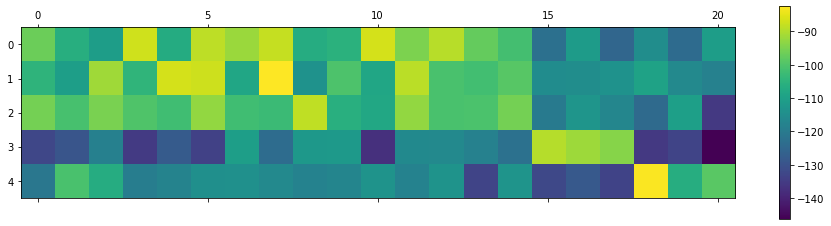

In [83]:
simulator.plot_gain_mat()

In [84]:
simulator.weighted_sum_rate_Gbps(Tx_powers=[500,350,500,600,255], Rx_weights=np.ones(len(simulator.x_Rx)))

69.92735293468556